In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd


In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
worksheet = gc.open('StudentsData').sheet1

In [ ]:
rows = worksheet.get_all_values()

In [ ]:
df = pd.DataFrame(rows[1:], columns=rows[0])

In [ ]:
df.head()

,,Input,Output
0,,1,11
1,,2,16
2,,3,21
3,,4,26
4,,5,31


In [ ]:
df = df.astype({'Input':'float'})
df = df.astype({'Output':'float'})

In [ ]:
df.dtypes

           object
Input     float64
Output    float64
dtype: object

In [ ]:
X=df[['Input']].values

In [ ]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

In [ ]:
Y=df[['Output']].values

In [ ]:
Y

array([[11.],
       [16.],
       [21.],
       [26.],
       [31.],
       [36.],
       [41.],
       [46.],
       [51.],
       [56.]])

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=50)

In [ ]:
X_train

array([[ 5.],
       [ 2.],
       [ 6.],
       [ 4.],
       [10.],
       [ 1.]])

In [ ]:
scaler=MinMaxScaler()

In [ ]:
scaler.fit(X_train)
scaler.fit(X_test)

MinMaxScaler()

In [ ]:
X_train1=scaler.transform(X_train)
X_test1=scaler.transform(X_test)

In [ ]:
X_train1

array([[ 0.33333333],
       [-0.16666667],
       [ 0.5       ],
       [ 0.16666667],
       [ 1.16666667],
       [-0.33333333]])

In [30]:
ai_brain=Sequential([
    Dense(4,activation='relu'),
    Dense(6,activation='relu'),
    Dense(1)
])

In [31]:
ai_brain.compile(optimizer='rmsprop',loss='mse')

In [32]:
ai_brain.fit(X_train1,Y_train,epochs=8000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 11ms/step - loss: 0.0016
Epoch 5502/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0016
Epoch 5503/8000
1/1 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 5504/8000
1/1 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 5505/8000
1/1 [==============================] - 0s 15ms/step - loss: 0.0017
Epoch 5506/8000
1/1 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 5507/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0016
Epoch 5508/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.0016
Epoch 5509/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0016
Epoch 5510/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0016
Epoch 5511/8000
1/1 [==============================] - 0s 16ms/step - loss: 0.0016
Epoch 5512/8000
1/1 [==============================] - 

In [33]:
loss_df=pd.DataFrame(ai_brain.history.history)

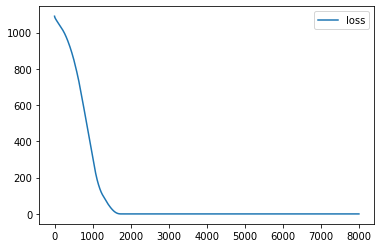

In [34]:
loss_df.plot()

In [35]:
ai_brain.evaluate(X_test1,Y_test)

1/1 [==============================] - 0s 94ms/step - loss: 0.0030


0.00301834917627275

In [36]:
input=[[100]]

In [37]:
input1=scaler.transform(input)

In [38]:
input1.shape

(1, 1)

In [39]:
ai_brain.predict(input1)

array([[469.27054]], dtype=float32)